In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [65]:
eps = 0.01
alpha = 0.1
steps = 1000

In [2]:
def var(y_orig, y_pred):
    cost = 0
    cost += ((y_orig - y_pred) ** 2)
    cost = cost.sum()
    return cost

In [3]:
def mse(y_orig, y_pred):
    return var(y_orig, y_pred) / y_orig.shape[0]

In [5]:
def R_sq(y_orig, y_pred):
    return (y_orig.var() - var(y_orig, y_pred)) / y_orig.var()

In [67]:
def gradient_descent(X, y, w, b, alpha):
    n = len(X)
    y_pred = w * X + b
    error = y_pred - y
    print(w, b)
    w_d = (1/n) * np.dot(X, error)
    b_d = (1/n) * np.sum(error)

    
    new_w = w - alpha * w_d
    new_b = b - alpha * b_d
    return new_w, new_b

In [63]:
def my_fit(X, y):
    w, b = (0, 0)
    for step in range(steps):
        w_new, b_new = gradient_descent(X, y, w, b, alpha)
        if abs(w_new - w) < eps and abs(b_new - b) < eps:
            break
        w, b = (w_new, b_new)
    return (w, b)

In [6]:
df = pd.read_csv('advertising.csv')

In [22]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='str')

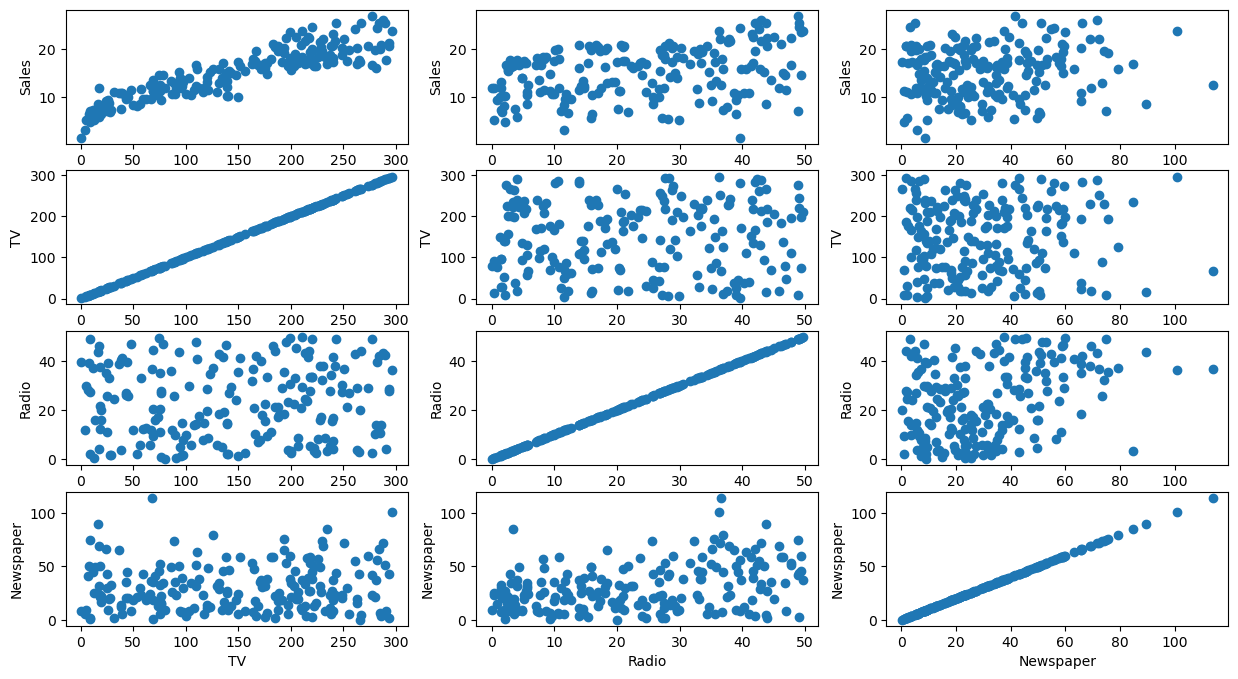

In [58]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 8))

rows = ['Sales', 'TV', 'Radio', 'Newspaper']
columns = ['TV', 'Radio', 'Newspaper']


for i in range(len(rows)):
    for j in range(len(columns)):
        axs[i, j].set(xlabel=columns[j], ylabel=rows[i])
        axs[i, j].scatter(x=df[columns[j]], y =df[rows[i]])

In [68]:
X = df['TV']
y = df['Sales']

w, b = my_fit(X, y)

0 0
263.161045 1.5130500000000002
-761494.3097910214 -3866.711000941251
2204247476.59206 11193724.17789378
-6380489396480.677 -32401731604.405647
1.8469180694345356e+16 93791149649758.55
-5.3461515931446075e+19 -2.7149103819014294e+17
1.5475151459010453e+23 7.858671537005949e+20
-4.4794897508405854e+26 -2.274797677973214e+24
1.2966482739141437e+30 6.584706398969593e+27
-3.75332200710813e+33 -1.906031414594298e+31
1.0864492995094973e+37 5.517263084028838e+34
-3.1448729370122275e+40 -1.5970456575536904e+38
9.1032557105215e+43 4.6228624473144065e+41
-2.6350592278577683e+47 -1.3381494201940994e+45
7.627531682201424e+50 3.8734526306445854e+48
-2.2078911528028393e+54 -1.1212227166433449e+52
6.391036505295921e+57 3.2455292479151357e+55
-1.8499710712719413e+61 -9.394618876976631e+58
5.354988915658821e+64 2.719398196776117e+62
-1.550073227205267e+68 -7.871662117930523e+65
4.486894459618028e+71 2.2785579755226916e+69
-1.2987916659943038e+75 -6.5955910836058686e+72
3.759526342413372e+78 1.9091821

/tmp/ipykernel_49632/3827399901.py:6: RuntimeWarning: overflow encountered in dot
  w_d = (1/n) * np.dot(X, error)
/tmp/ipykernel_49632/3827399901.py:10: RuntimeWarning: invalid value encountered in scalar subtract
  new_w = w - alpha * w_d
